In [1]:
import pandas as pd
import yfinance as yf

In [2]:
# here i am downloading the dataset from yahoo finance and storing it
sp500 = yf.download("^GSPC", start="2005-01-01")

[*********************100%***********************]  1 of 1 completed


In [3]:
sp500.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2005-01-03,1202.079956,1217.800049,1200.319946,1211.920044,1510800000
2005-01-04,1188.050049,1205.839966,1185.390015,1202.079956,1721000000
2005-01-05,1183.739990,1192.729980,1183.719971,1188.050049,1738900000
2005-01-06,1187.890015,1191.630005,1183.270020,1183.739990,1569100000
2005-01-07,1186.189941,1192.199951,1182.160034,1187.890015,1477900000


In [4]:
sp500.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 5302 entries, 2005-01-03 to 2026-01-29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, ^GSPC)   5302 non-null   float64
 1   (High, ^GSPC)    5302 non-null   float64
 2   (Low, ^GSPC)     5302 non-null   float64
 3   (Open, ^GSPC)    5302 non-null   float64
 4   (Volume, ^GSPC)  5302 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 248.5 KB


In [5]:
# saving the original data set
sp500.to_csv("../data/raw/sp500_raw.csv")

In [24]:
sp500.columns = sp500.columns.get_level_values(0)

In [6]:
# here we create a return column to store the %changes 
sp500["Return"] = sp500["Close"].pct_change()

In [7]:
sp500[["Close", "Return"]].head()

Price,Close,Return
Ticker,^GSPC,
Date,,
2005-01-03,1202.079956,NaN
2005-01-04,1188.050049,-0.011671
2005-01-05,1183.739990,-0.003628
2005-01-06,1187.890015,0.003506
2005-01-07,1186.189941,-0.001431


In [8]:
sp500["Return"].describe()

count    5301.000000
mean        0.000404
std         0.012048
min        -0.119841
25%        -0.004040
50%         0.000735
75%         0.005721
max         0.115800
Name: Return, dtype: float64

In [9]:
# saving the updated dataset
sp500.to_csv("../data/processed/sp500_with_returns.csv")

In [10]:
# computing the rolling volatility and creating 2 new columns for the same for 20 day and 50 day period
sp500["Volatility_20"] = sp500["Return"].rolling(window=20).std()
sp500["Volatility_50"] = sp500["Return"].rolling(window=50).std()

In [11]:
sp500[["Return", "Volatility_20", "Volatility_50"]].head(30)

Price,Return,Volatility_20,Volatility_50
Ticker,,,
Date,,,
2005-01-03,NaN,NaN,NaN
2005-01-04,-0.011671,NaN,NaN
2005-01-05,-0.003628,NaN,NaN
2005-01-06,0.003506,NaN,NaN
2005-01-07,-0.001431,NaN,NaN
2005-01-10,0.003423,NaN,NaN
2005-01-11,-0.006100,NaN,NaN
2005-01-12,0.003981,NaN,NaN


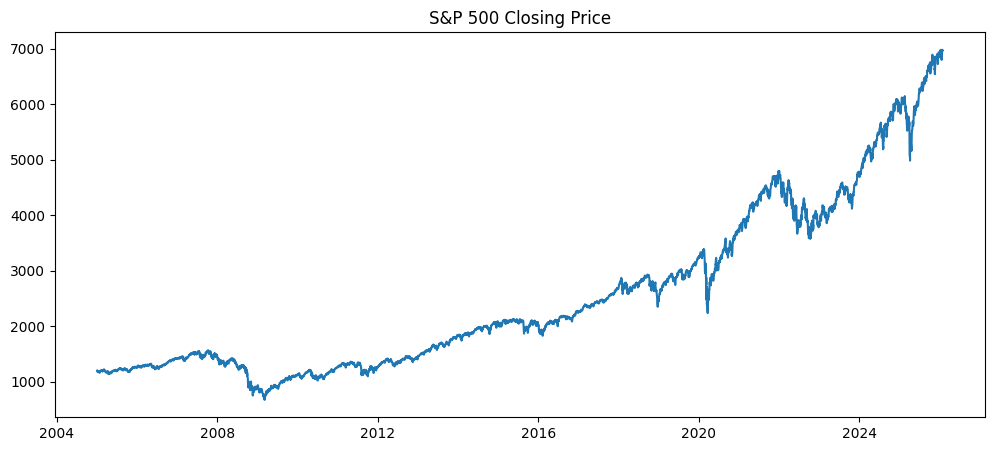

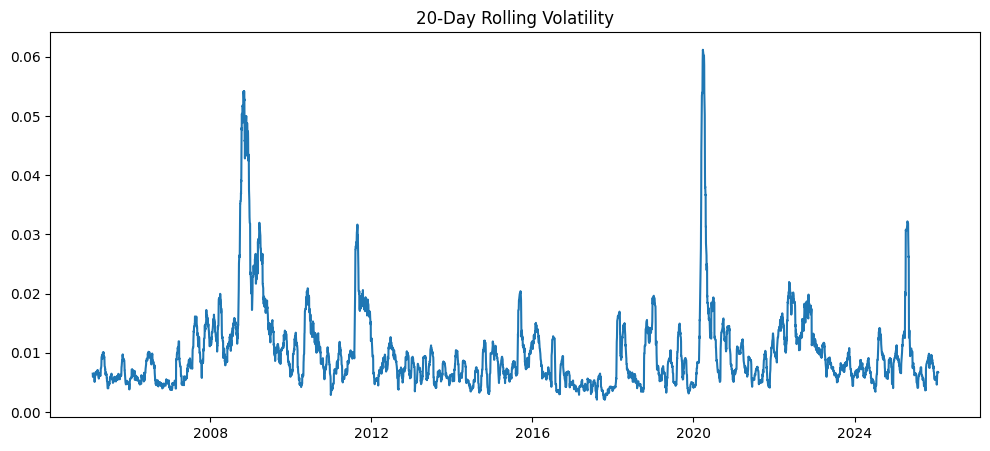

In [12]:
# plotting closing prices and 20-day rolling volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Close"])
plt.title("S&P 500 Closing Price")
plt.show()

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Volatility_20"])
plt.title("20-Day Rolling Volatility")
plt.show()


In [13]:
sp500.to_csv("../data/processed/sp500_with_returns_and_volatility.csv")

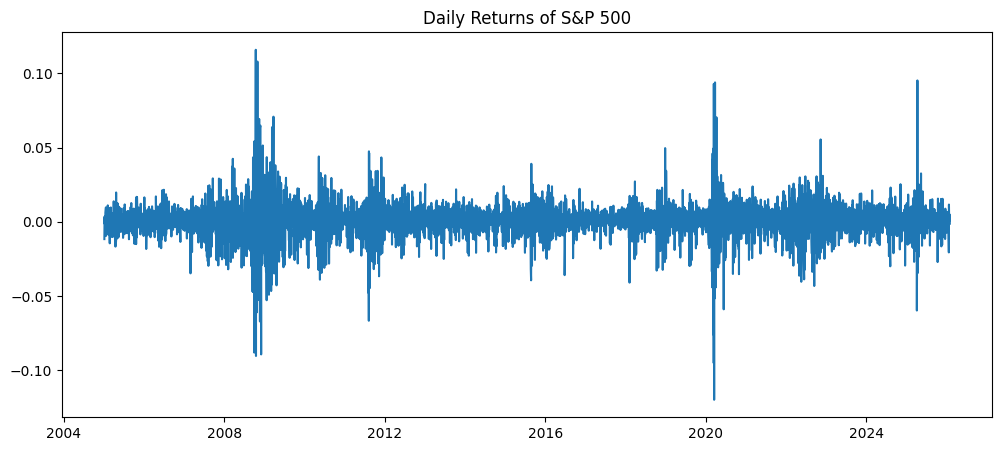

In [17]:
# plotting daily returns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Return"])
plt.title("Daily Returns of S&P 500")
plt.show()
# shows market are erratic 

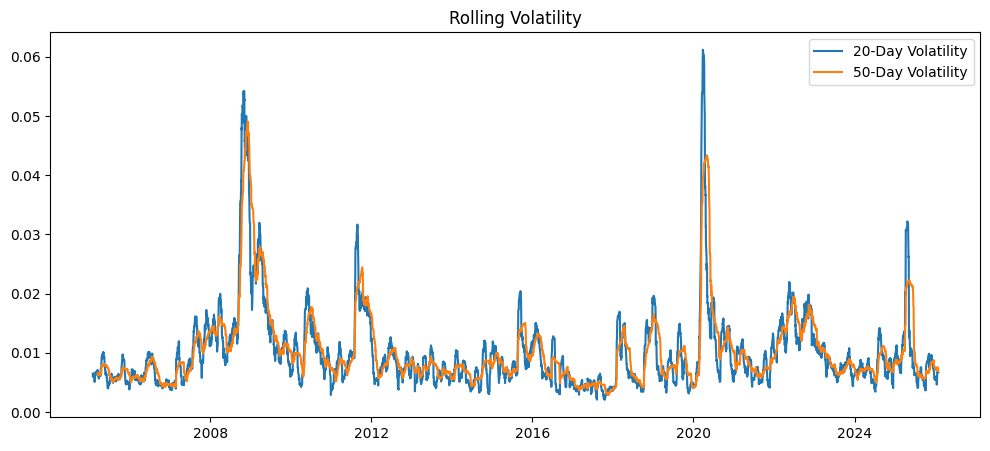

In [15]:
# plot rolling volatility
plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Volatility_20"], label="20-Day Volatility")
plt.plot(sp500.index, sp500["Volatility_50"], label="50-Day Volatility")
plt.legend()
plt.title("Rolling Volatility")
plt.show()

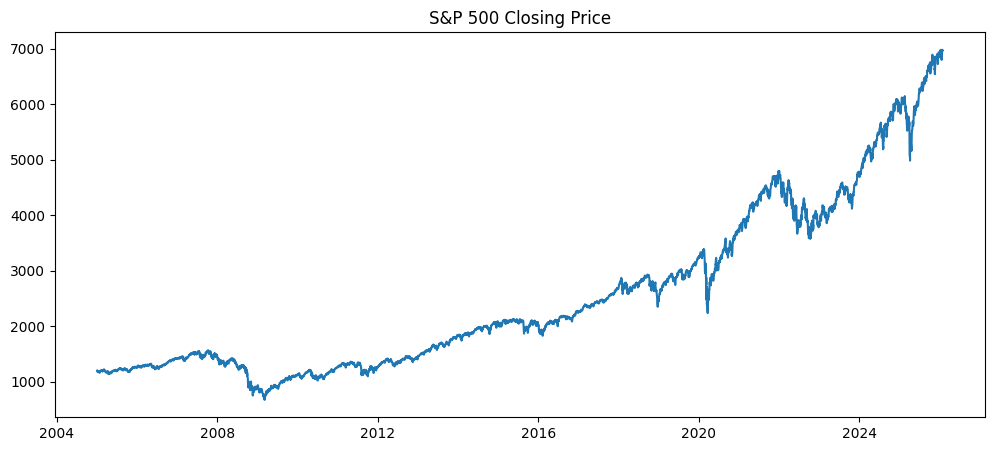

In [16]:
# compare price and volatility
plt.figure(figsize=(12,5))
plt.plot(sp500.index, sp500["Close"])
plt.title("S&P 500 Closing Price")
plt.show()

Volatility shows clustering: calm periods followed by bursts.
Large volatility spikes often align with sharp market drops.
Short-term volatility reacts faster than long-term volatility.


In [30]:
# to see days where markets fell more than 2%
sp500["Large_Negative_Return"] = sp500["Return"] < -0.02
# this returns a true or false value: true for returns less than 2% and accordingly
# primarily used to detect shocks

In [32]:
# rolling avg return (taking mean of returns for a window period of 20 days)
sp500["Rolling_Return_20"] = sp500["Return"].rolling(20).mean()
# this is to notice pattern and not just daily market movement

In [35]:
sp500["Cumulative_Max"] = sp500["Close"].cummax() # this is to remember the highest price seen so far so that we know past peak everyday

# here we now calculate the difference between the closing price and the peak price and store it in terms of percentage
sp500["Drawdown"] = (sp500["Close"] - sp500["Cumulative_Max"]) / sp500["Cumulative_Max"]
# this tells us how low the market is from the peak value

In [23]:
type(sp500["Close"])


pandas.DataFrame

In [26]:
sp500[["Close","Cumulative_Max","Drawdown"]].head()

Price,Close,Cumulative_Max,Drawdown
Date,,,
2005-01-03,1202.079956,1202.079956,0.000000
2005-01-04,1188.050049,1202.079956,-0.011671
2005-01-05,1183.739990,1202.079956,-0.015257
2005-01-06,1187.890015,1202.079956,-0.011804
2005-01-07,1186.189941,1202.079956,-0.013219


In [27]:
sp500[[
    "Return",
    "Large_Negative_Return",
    "Rolling_Return_20",
    "Drawdown"
]].head(30)

Price,Return,Large_Negative_Return,Rolling_Return_20,Drawdown
Date,,,,
2005-01-03,NaN,False,NaN,0.000000
2005-01-04,-0.011671,False,NaN,-0.011671
2005-01-05,-0.003628,False,NaN,-0.015257
2005-01-06,0.003506,False,NaN,-0.011804
2005-01-07,-0.001431,False,NaN,-0.013219
2005-01-10,0.003423,False,NaN,-0.009841
2005-01-11,-0.006100,False,NaN,-0.015881
2005-01-12,0.003981,False,NaN,-0.011963
2005-01-13,-0.008630,False,NaN,-0.020489


In [28]:
sp500.to_csv("../data/processed/sp500_with_features.csv")